<a href="https://colab.research.google.com/github/megmkoch/IceJamProjectFall2022/blob/main/2016_2017_IceJamProjectFall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install libpysal
!pip install rasterio
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 37.7 MB/s 
     |████████████████████████████████| 6.3 MB 19.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 10.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [2]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep

In [3]:
import urllib.request

#define online filepath (aka url)
#Dec07-Dec19
dec192016_url = 'https://d3gm2hf49xd6jj.cloudfront.net/01b03161-e18b-45f1-80f4-e396aa52714c/S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0.zip'

#define local filepath
dec192016_filepath = 'S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0.zip'

#download data
urllib.request.urlretrieve(dec192016_url, dec192016_filepath)

#unzip file 
!unzip S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0.zip

Archive:  S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0.zip
   creating: S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0/
  inflating: S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0/S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0_amp.tif.xml  
  inflating: S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0/S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0_wrapped_phase.tif  
  inflating: S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0/S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0_unw_phase.kmz  
  inflating: S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0/S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0_wrapped_phase.tif.xml  
  inflating: S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0/S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0_corr.tif  
  inflating: S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0/S1AA_20161207T22

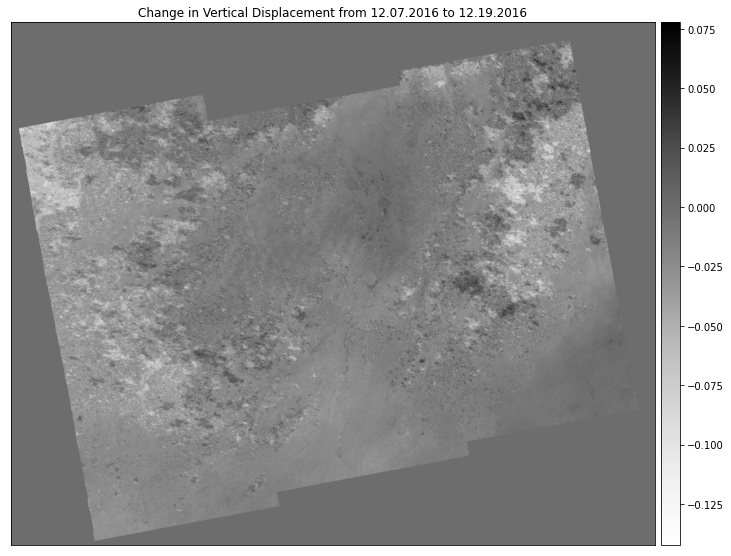

In [4]:
# open and plot vertical displacement map
with rio.open('S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0/S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0_vert_disp.tif') as vert_disp_src:
    dec192016 = vert_disp_src.read(1)

ep.plot_bands(dec192016,
              title="Change in Vertical Displacement from 12.07.2016 to 12.19.2016",
              cmap="Greys")

plt.show()

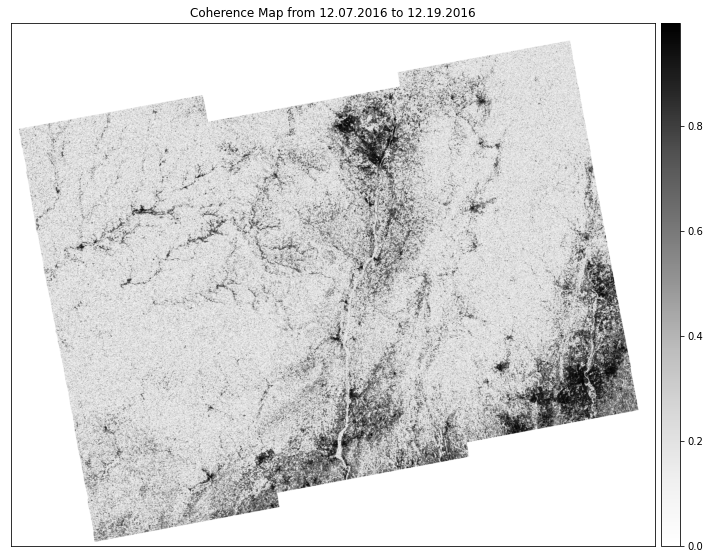

In [5]:
with rio.open('S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0/S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0_corr.tif') as coherence_src:
    dec192016_corr = coherence_src.read(1)

ep.plot_bands(dec192016_corr,
              title="Coherence Map from 12.07.2016 to 12.19.2016",
              cmap="Greys")

plt.show()

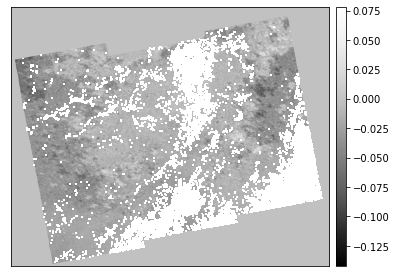

In [6]:
# masking the vertical displacement array (dec192016) by using coherence array (dec192016_corr) where condition coherence array >0.8 is true
dec192016_mask = np.ma.masked_where(dec192016_corr > 0.8, dec192016)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(dec192016_mask,
               ax=ax,
               scale=False)
plt.show()

In [7]:
#define online filepath (aka url)
#Dec19-Dec31
dec312016_url = 'https://d3gm2hf49xd6jj.cloudfront.net/3d7bb95f-297a-4291-aa56-f446e1bad538/S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825.zip'

#define local filepath
dec312016_filepath = 'S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825.zip'

#download data
urllib.request.urlretrieve(dec312016_url, dec312016_filepath)

#unzip file 
!unzip S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825.zip

Archive:  S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825.zip
   creating: S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825/
  inflating: S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825/S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825_corr.tif.xml  
  inflating: S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825/S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825_color_phase.png  
  inflating: S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825/S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825_unw_phase.png  
  inflating: S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825/S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825_water_mask.tif.xml  
  inflating: S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825/S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825_vert_disp.tif.xml  
  inflating: S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825/S1AA_201612

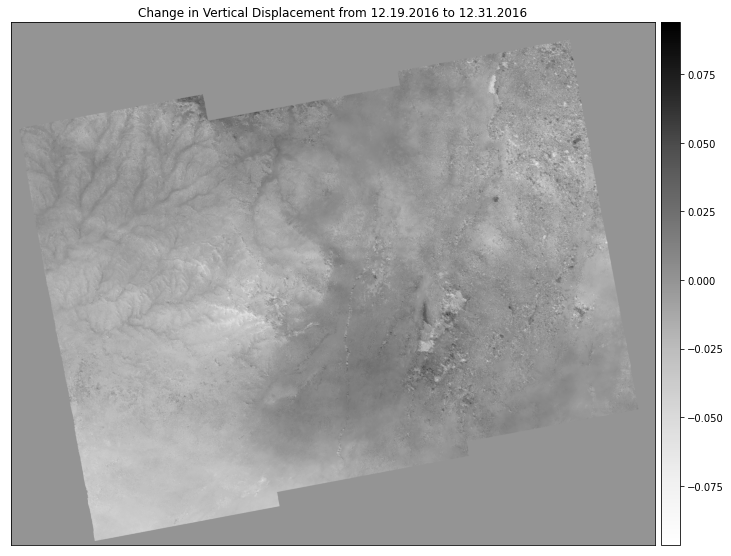

In [8]:
# open and plot vertical displacement map
with rio.open('S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825/S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825_vert_disp.tif') as vert_disp_src:
    dec312016 = vert_disp_src.read(1)

ep.plot_bands(dec312016,
              title="Change in Vertical Displacement from 12.19.2016 to 12.31.2016",
              cmap="Greys")

plt.show()

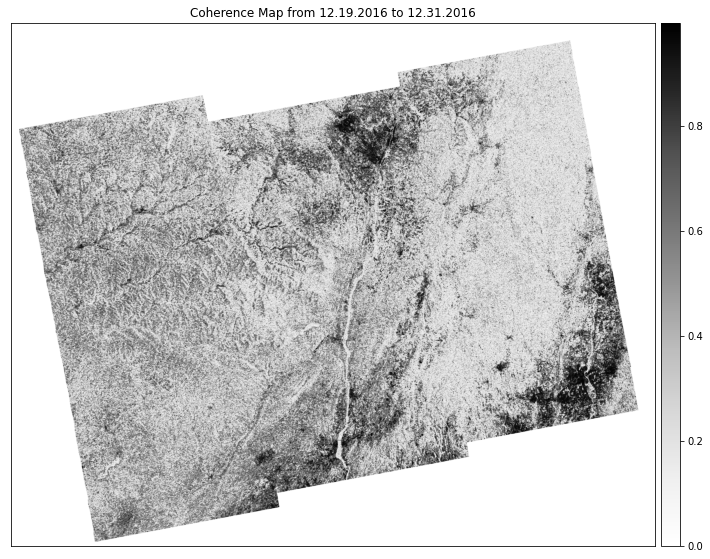

In [9]:
with rio.open('S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825/S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825_corr.tif') as coherence_src:
    dec312016_corr = coherence_src.read(1)

ep.plot_bands(dec312016_corr,
              title="Coherence Map from 12.19.2016 to 12.31.2016",
              cmap="Greys")

plt.show()

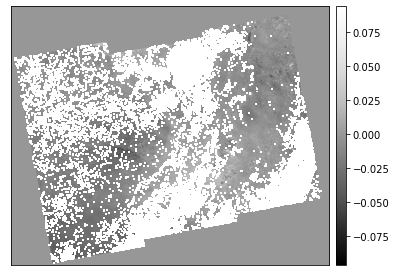

In [10]:
# masking the vertical displacement array (dec312016) by using coherence array (dec312016_corr) where condition coherence array >0.8 is true
dec312016_mask = np.ma.masked_where(dec312016_corr > 0.8, dec312016)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(dec312016_mask,
               ax=ax,
               scale=False)
plt.show()

In [11]:
#define online filepath (aka url)
#Dec31-Jan12
jan122017_url = 'https://d3gm2hf49xd6jj.cloudfront.net/bddfe901-bcc1-46fb-a6d6-e81a439cd873/S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF.zip'

#define local filepath
jan122017_filepath = 'S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF.zip'

#download data
urllib.request.urlretrieve(jan122017_url, jan122017_filepath)

#unzip file 
!unzip S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF.zip

Archive:  S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF.zip
   creating: S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF/
  inflating: S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF/S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF_amp.tif.xml  
  inflating: S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF/S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF_los_disp.tif  
  inflating: S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF/S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF_los_disp.tif.xml  
  inflating: S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF/S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF_vert_disp.tif.xml  
  inflating: S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF/S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF.README.md.txt  
  inflating: S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF/S1AA_20161231T225

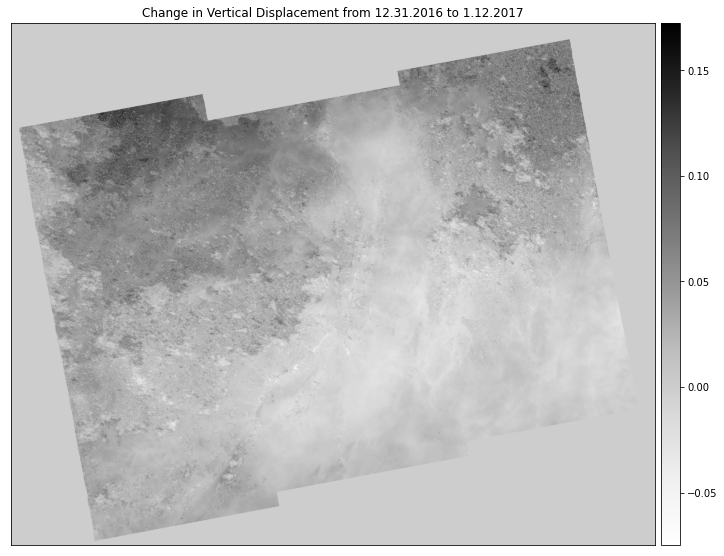

In [12]:
# open and plot vertical displacement map
with rio.open('S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF/S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF_vert_disp.tif') as vert_disp_src:
    jan122017 = vert_disp_src.read(1)

ep.plot_bands(jan122017,
              title="Change in Vertical Displacement from 12.31.2016 to 1.12.2017",
              cmap="Greys")

plt.show()

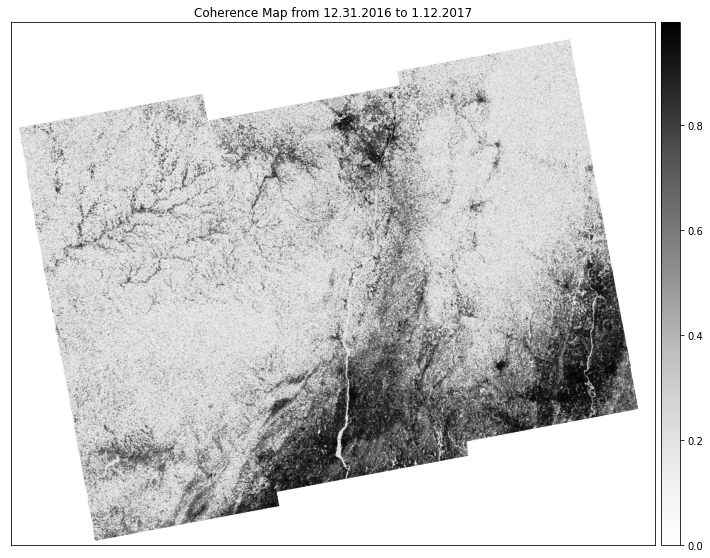

In [13]:
with rio.open('S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF/S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF_corr.tif') as coherence_src:
    jan122017_corr = coherence_src.read(1)

ep.plot_bands(jan122017_corr,
              title="Coherence Map from 12.31.2016 to 1.12.2017",
              cmap="Greys")

plt.show()

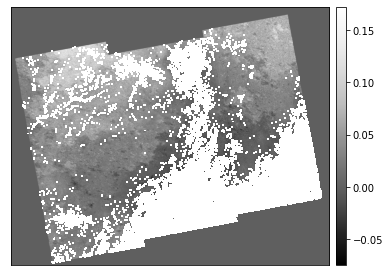

In [14]:
# masking the vertical displacement array (jan122017) by using coherence array (jan122017_corr) where condition coherence array >0.8 is true
jan122017_mask = np.ma.masked_where(jan122017_corr > 0.8, jan122017)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(jan122017_mask,
               ax=ax,
               scale=False)
plt.show()

In [15]:
#define online filepath (aka url)
#Jan12-Jan24
jan242017_url = 'https://d3gm2hf49xd6jj.cloudfront.net/7f5e41f0-9d0a-4be2-8ff3-80a5dba48a1c/S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B.zip'

#define local filepath
jan242017_filepath = 'S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B.zip'

#download data
urllib.request.urlretrieve(jan242017_url, jan242017_filepath)

#unzip file 
!unzip S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B.zip

Archive:  S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B.zip
   creating: S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B/
  inflating: S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B/S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B_color_phase.png.aux.xml  
  inflating: S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B/S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B_unw_phase.png.aux.xml  
  inflating: S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B/S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B_color_phase.png.xml  
  inflating: S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B/S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B_dem.tif  
  inflating: S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B/S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B_color_phase.kmz  
  inflating: S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B/S

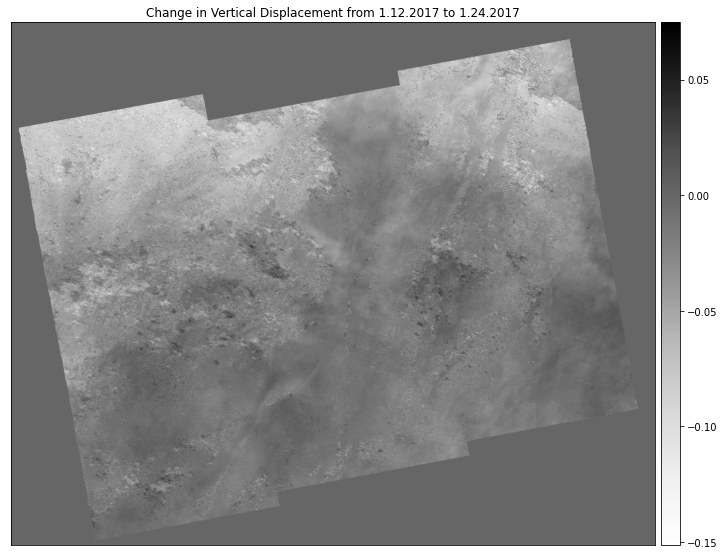

In [16]:
# open and plot vertical displacement map
with rio.open('S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B/S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B_vert_disp.tif') as vert_disp_src:
    jan242017 = vert_disp_src.read(1)

ep.plot_bands(jan242017,
              title="Change in Vertical Displacement from 1.12.2017 to 1.24.2017",
              cmap="Greys")

plt.show()

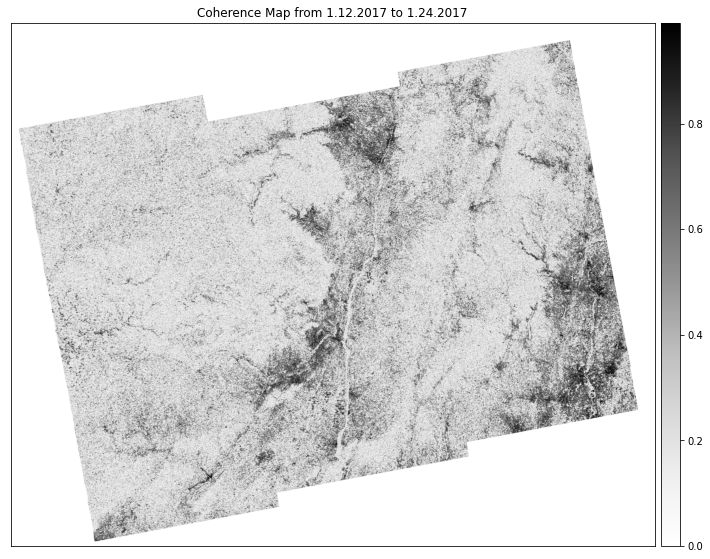

In [17]:
with rio.open('S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B/S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B_corr.tif') as coherence_src:
    jan242017_corr = coherence_src.read(1)

ep.plot_bands(jan242017_corr,
              title="Coherence Map from 1.12.2017 to 1.24.2017",
              cmap="Greys")

plt.show()

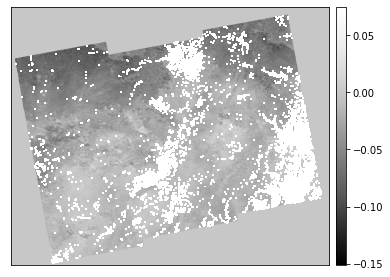

In [18]:
# masking the vertical displacement array (jan242017) by using coherence array (jan242017_corr) where condition coherence array >0.8 is true
jan242017_mask = np.ma.masked_where(jan242017_corr > 0.8, jan242017)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(jan242017_mask,
               ax=ax,
               scale=False)
plt.show()

In [19]:
#define online filepath (aka url)
#Jan24-Feb05
feb052017_url = 'https://d3gm2hf49xd6jj.cloudfront.net/63765d36-b988-4c91-8710-6069a3493072/S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9.zip'

#define local filepath
feb052017_filepath = 'S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9.zip'

#download data
urllib.request.urlretrieve(feb052017_url, feb052017_filepath)

#unzip file 
!unzip S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9.zip

Archive:  S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9.zip
   creating: S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9/
  inflating: S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9/S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9_water_mask.tif.xml  
  inflating: S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9/S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9_corr.tif.xml  
  inflating: S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9/S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9_color_phase.png.xml  
  inflating: S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9/S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9_unw_phase.tif.xml  
  inflating: S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9/S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9_unw_phase.tif  
  inflating: S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9/S1AA_20

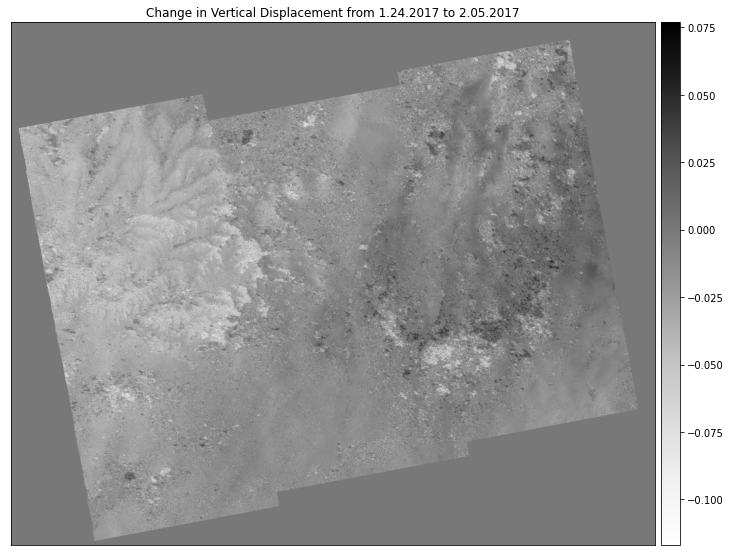

In [20]:
# open and plot vertical displacement map
with rio.open('S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9/S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9_vert_disp.tif') as vert_disp_src:
    feb052017 = vert_disp_src.read(1)

ep.plot_bands(feb052017,
              title="Change in Vertical Displacement from 1.24.2017 to 2.05.2017",
              cmap="Greys")

plt.show()

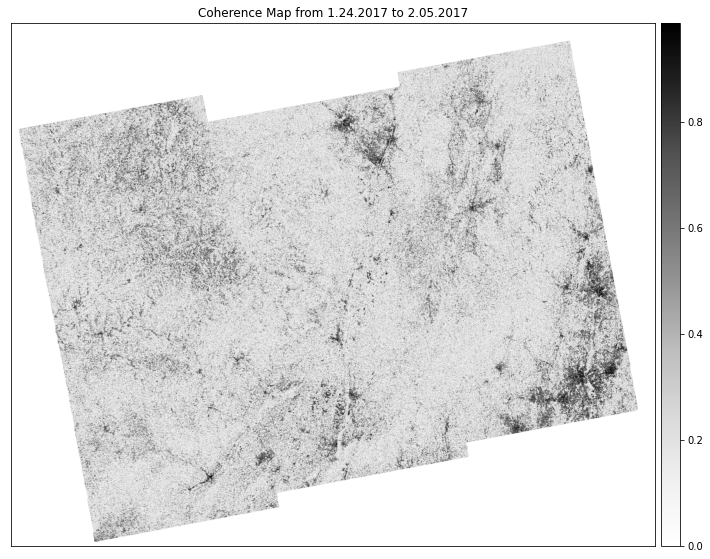

In [21]:
with rio.open('S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9/S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9_corr.tif') as coherence_src:
    feb052017_corr = coherence_src.read(1)

ep.plot_bands(feb052017_corr,
              title="Coherence Map from 1.24.2017 to 2.05.2017",
              cmap="Greys")

plt.show()

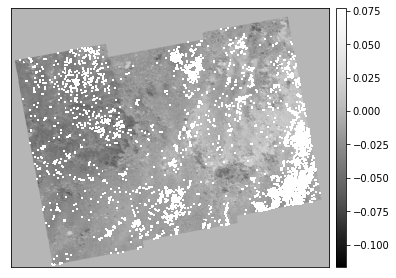

In [22]:
# masking the vertical displacement array (feb052017) by using coherence array (feb052017_corr) where condition coherence array >0.8 is true
feb052017_mask = np.ma.masked_where(feb052017_corr > 0.8, feb052017)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(feb052017_mask,
               ax=ax,
               scale=False)
plt.show()

In [23]:
#define online filepath (aka url)
#Feb05-Feb17
feb172017_url = 'https://d3gm2hf49xd6jj.cloudfront.net/866da3ce-7e2b-45f5-b5db-fcafaafd6fb6/S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124.zip'

#define local filepath
feb172017_filepath = 'S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124.zip'

#download data
urllib.request.urlretrieve(feb172017_url, feb172017_filepath)

#unzip file 
!unzip S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124.zip

Archive:  S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124.zip
   creating: S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124/
  inflating: S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124/S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124_wrapped_phase.tif.xml  
  inflating: S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124/S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124_dem.tif  
  inflating: S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124/S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124_amp.tif.xml  
  inflating: S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124/S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124_unw_phase.png  
  inflating: S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124/S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124_unw_phase.png.xml  
  inflating: S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124/S1AA_20170205T225

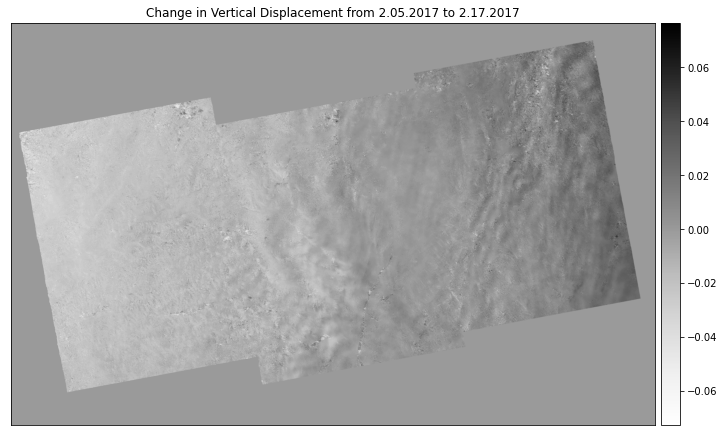

In [24]:
# open and plot vertical displacement map
with rio.open('S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124/S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124_vert_disp.tif') as vert_disp_src:
    feb172017 = vert_disp_src.read(1)

ep.plot_bands(feb172017,
              title="Change in Vertical Displacement from 2.05.2017 to 2.17.2017",
              cmap="Greys")

plt.show()

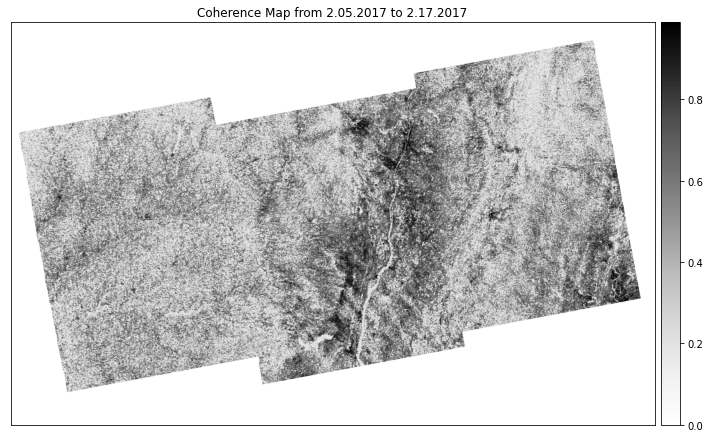

In [25]:
with rio.open('S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124/S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124_corr.tif') as coherence_src:
    feb172017_corr = coherence_src.read(1)

ep.plot_bands(feb172017_corr,
              title="Coherence Map from 2.05.2017 to 2.17.2017",
              cmap="Greys")

plt.show()

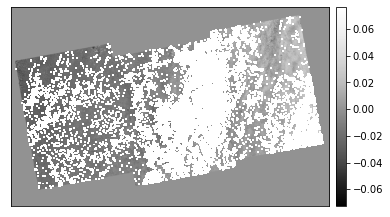

In [26]:
# masking the vertical displacement array (feb172017) by using coherence array (feb172017_corr) where condition coherence array >0.8 is true
feb172017_mask = np.ma.masked_where(feb172017_corr > 0.8, feb172017)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(feb172017_mask,
               ax=ax,
               scale=False)
plt.show()

In [27]:
#define online filepath (aka url)
#Feb17-Mar13
mar132017_url = 'https://d3gm2hf49xd6jj.cloudfront.net/51f3d5b3-daa5-45e1-8c5a-4a59f09a47d0/S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF.zip'

#define local filepath
mar132017_filepath = 'S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF.zip'

#download data
urllib.request.urlretrieve(mar132017_url, mar132017_filepath)

#unzip file 
!unzip S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF.zip

Archive:  S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF.zip
   creating: S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF/
  inflating: S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF/S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF_dem.tif  
  inflating: S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF/S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF_unw_phase.png.xml  
  inflating: S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF/S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF_los_disp.tif  
  inflating: S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF/S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF_unw_phase.kmz  
  inflating: S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF/S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF_color_phase.png  
  inflating: S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF/S1AA_20170217T225113_2

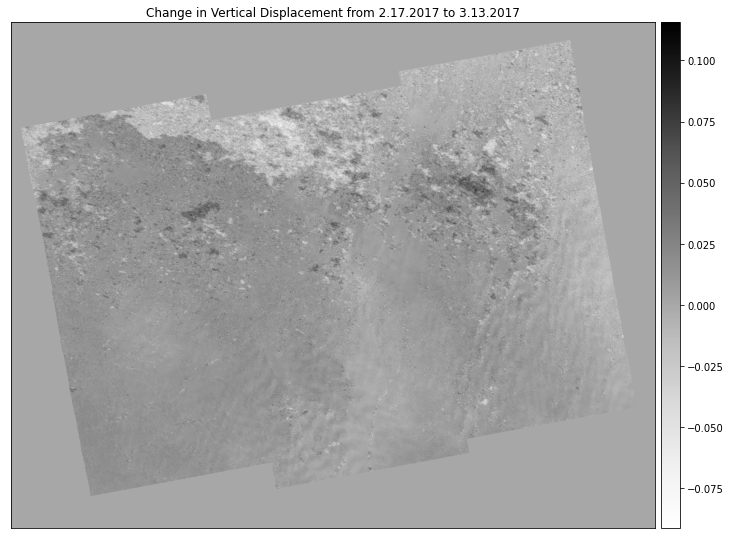

In [28]:
# open and plot vertical displacement map
with rio.open('S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF/S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF_vert_disp.tif') as vert_disp_src:
    mar132017 = vert_disp_src.read(1)

ep.plot_bands(mar132017,
              title="Change in Vertical Displacement from 2.17.2017 to 3.13.2017",
              cmap="Greys")

plt.show()

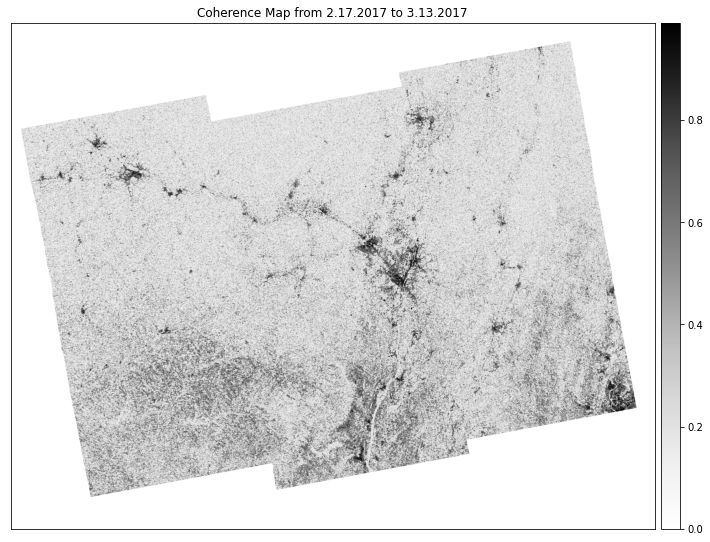

In [29]:
with rio.open('S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF/S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF_corr.tif') as coherence_src:
    mar132017_corr = coherence_src.read(1)

ep.plot_bands(mar132017_corr,
              title="Coherence Map from 2.17.2017 to 3.13.2017",
              cmap="Greys")

plt.show()

In [ ]:
# masking the vertical displacement array (mar132017) by using coherence array (mar132017_corr) where condition coherence array >0.8 is true
mar132017_mask = np.ma.masked_where(mar132017_corr > 0.8, feb172017)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(mar132017_mask,
               ax=ax,
               scale=False)
plt.show()

In [30]:
#Mar13-Mar25
mar252017_url = 'https://d3gm2hf49xd6jj.cloudfront.net/356fe323-4709-4019-833b-491c5ce919e6/S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115.zip'

#define local filepath
mar252017_filepath = 'S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115.zip'

#download data
urllib.request.urlretrieve(mar252017_url, mar252017_filepath)

#unzip file 
!unzip S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115.zip

Archive:  S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115.zip
   creating: S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115/
  inflating: S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115/S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115_unw_phase.tif  
  inflating: S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115/S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115_wrapped_phase.tif.xml  
  inflating: S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115/S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115_unw_phase.tif.xml  
  inflating: S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115/S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115_color_phase.png.aux.xml  
  inflating: S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115/S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115_water_mask.tif  
  inflating: S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_211

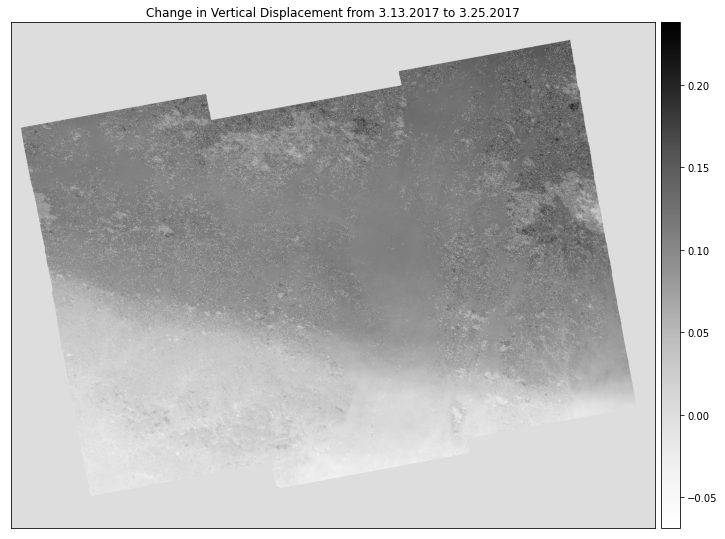

In [31]:
# open and plot vertical displacement map
with rio.open('S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115/S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115_vert_disp.tif') as vert_disp_src:
    mar252017 = vert_disp_src.read(1)

ep.plot_bands(mar252017,
              title="Change in Vertical Displacement from 3.13.2017 to 3.25.2017",
              cmap="Greys")

plt.show()

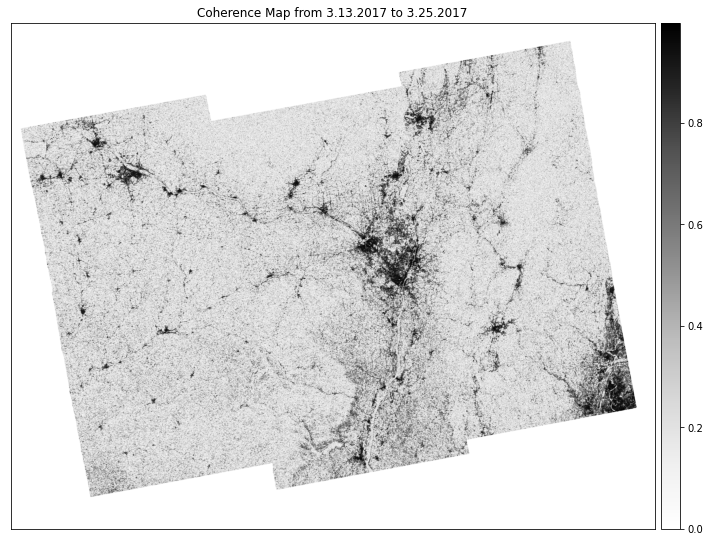

In [32]:
with rio.open('S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115/S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115_corr.tif') as coherence_src:
    mar252017_corr = coherence_src.read(1)

ep.plot_bands(mar252017_corr,
              title="Coherence Map from 3.13.2017 to 3.25.2017",
              cmap="Greys")

plt.show()

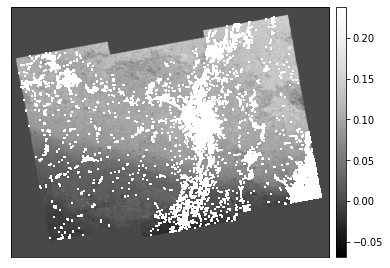

In [34]:
# masking the vertical displacement array (mar252017) by using coherence array (mar252017_corr) where condition coherence array >0.8 is true
mar252017_mask = np.ma.masked_where(mar252017_corr > 0.8, mar252017)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(mar252017_mask,
               ax=ax,
               scale=False)
plt.show()